<a href="https://colab.research.google.com/github/leonardo69-code/Python---Banco-de-Dados/blob/main/C%C3%B3pia_de_PySpark_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação da biblioteca pandas
import pandas as pd

In [ ]:
# Instalação dos requisitos para o PySpark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
# Configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
# Torna o pyspark "importável"
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

# Inicializar a SparkSession com suporte ao Hive
spark = SparkSession.builder \
    .appName("Spark with Hive on Colab") \
    .config("spark.sql.catalogImplementation", "hive") \
    .config("spark.sql.warehouse.dir", "/content/spark-warehouse") \
    .config("hive.metastore.warehouse.dir", "/content/spark-warehouse") \
    .enableHiveSupport() \
    .getOrCreate()

# Criar diretório para o warehouse
!mkdir -p /content/spark-warehouse

In [ ]:
# Verifica o SparkContext
print(spark)

# Exibe a Spark version
print(spark.version)

3.1.1


In [ ]:
'''
Aplicar agregações ou cálculos: Operações como médias, somas e contagens podem
ser realizadas com funções da biblioteca pyspark.sql.functions
(importadas como F).
'''
from pyspark.sql import functions as F

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR2snMwL0lRHwNv3ilck0T98nhhyAqzmU5oQMKY4nwKZu_0FkiGo8U7ZXvA63CQOg2bYfmhKc6c-dL1/pub?gid=0&single=true&output=csv')
display(df)

,matricula,nome,cidade,estado,pais,idade,departamento,cargo,salario,escolaridade,nota
0,1,Lucas,Atibaia,SP,Brasil,35,Compras,Gerente,25000,Superior,8
1,2,Ana,São Paulo,SP,Brasil,29,Vendas,Coordenador,12000,Superior,6
2,3,Luiza,Santos,SP,Brasil,38,Finanças,Gerente,28000,MBA,9
3,4,Fernando,Atibaia,SP,Brasil,36,Marketing,Diretor,40000,Mestrado,7
4,5,Sandra,Atibaia,SP,Brasil,28,Produção,Analista,23000,Superior,5
5,6,Douglas,Bragança,SP,Brasil,29,Finanças,Analista,11000,Superior,9
6,7,Eduardo,Extrema,MG,Brasil,30,Marketing,Gerente,12000,MBA,4
7,8,Ester,Itapeva,MG,Brasil,29,Compras,Analista,10000,Superior,2
8,9,Pedro,Extrema,MG,Brasil,30,Marketing,Analista,13000,Superior,1
9,10,Maria,Extrema,MG,Brasil,40,Produção,Analista,12000,MBA,7


In [ ]:
df.to_csv('dados.csv',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   matricula     10 non-null     int64 
 1   nome          10 non-null     object
 2   cidade        10 non-null     object
 3   estado        10 non-null     object
 4   pais          10 non-null     object
 5   idade         10 non-null     int64 
 6   departamento  10 non-null     object
 7   cargo         10 non-null     object
 8   salario       10 non-null     int64 
 9   escolaridade  10 non-null     object
 10  nota          10 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 1008.0+ bytes


In [ ]:
# Cria a tabela funcionários
spark.sql('''
CREATE TABLE IF NOT EXISTS funcionarios (
  matricula INT,
  nome STRING,
  cidade STRING,
  estado STRING,
  pais STRING,
  idade INT,
  departamento STRING,
  cargo STRING,
  salario DOUBLE,
  escolaridade STRING,
  nota INT
)

USING CSV
OPTIONS (path '/content/dados.csv', header 'true', inferSchema 'true')
''')
funcionarios = spark.sql('''
SELECT *
FROM funcionarios
''')

In [ ]:
funcionarios.show()

+---------+--------+---------+------+------+-----+------------+-----------+-------+------------+----+
|matricula|    nome|   cidade|estado|  pais|idade|departamento|      cargo|salario|escolaridade|nota|
+---------+--------+---------+------+------+-----+------------+-----------+-------+------------+----+
|        1|   Lucas|  Atibaia|    SP|Brasil|   35|     Compras|    Gerente|25000.0|    Superior|   8|
|        2|     Ana|São Paulo|    SP|Brasil|   29|      Vendas|Coordenador|12000.0|    Superior|   6|
|        3|   Luiza|   Santos|    SP|Brasil|   38|    Finanças|    Gerente|28000.0|         MBA|   9|
|        4|Fernando|  Atibaia|    SP|Brasil|   36|   Marketing|    Diretor|40000.0|    Mestrado|   7|
|        5|  Sandra|  Atibaia|    SP|Brasil|   28|    Produção|   Analista|23000.0|    Superior|   5|
|        6| Douglas| Bragança|    SP|Brasil|   29|    Finanças|   Analista|11000.0|    Superior|   9|
|        7| Eduardo|  Extrema|    MG|Brasil|   30|   Marketing|    Gerente|12000.0

In [ ]:
df = funcionarios.toPandas()
display(df)

,matricula,nome,cidade,estado,pais,idade,departamento,cargo,salario,escolaridade,nota
0,1,Lucas,Atibaia,SP,Brasil,35,Compras,Gerente,25000.0,Superior,8
1,2,Ana,São Paulo,SP,Brasil,29,Vendas,Coordenador,12000.0,Superior,6
2,3,Luiza,Santos,SP,Brasil,38,Finanças,Gerente,28000.0,MBA,9
3,4,Fernando,Atibaia,SP,Brasil,36,Marketing,Diretor,40000.0,Mestrado,7
4,5,Sandra,Atibaia,SP,Brasil,28,Produção,Analista,23000.0,Superior,5
5,6,Douglas,Bragança,SP,Brasil,29,Finanças,Analista,11000.0,Superior,9
6,7,Eduardo,Extrema,MG,Brasil,30,Marketing,Gerente,12000.0,MBA,4
7,8,Ester,Itapeva,MG,Brasil,29,Compras,Analista,10000.0,Superior,2
8,9,Pedro,Extrema,MG,Brasil,30,Marketing,Analista,13000.0,Superior,1
9,10,Maria,Extrema,MG,Brasil,40,Produção,Analista,12000.0,MBA,7


In [ ]:
# Convertendo um ojeto pandas em um df pyspark
funcionarios2 = spark.createDataFrame(df.to_dict(orient='records'))

In [ ]:
funcionarios2.show()

+-----------+---------+------------+------------+------+-----+---------+--------+----+------+-------+
|      cargo|   cidade|departamento|escolaridade|estado|idade|matricula|    nome|nota|  pais|salario|
+-----------+---------+------------+------------+------+-----+---------+--------+----+------+-------+
|    Gerente|  Atibaia|     Compras|    Superior|    SP|   35|        1|   Lucas|   8|Brasil|25000.0|
|Coordenador|São Paulo|      Vendas|    Superior|    SP|   29|        2|     Ana|   6|Brasil|12000.0|
|    Gerente|   Santos|    Finanças|         MBA|    SP|   38|        3|   Luiza|   9|Brasil|28000.0|
|    Diretor|  Atibaia|   Marketing|    Mestrado|    SP|   36|        4|Fernando|   7|Brasil|40000.0|
|   Analista|  Atibaia|    Produção|    Superior|    SP|   28|        5|  Sandra|   5|Brasil|23000.0|
|   Analista| Bragança|    Finanças|    Superior|    SP|   29|        6| Douglas|   9|Brasil|11000.0|
|    Gerente|  Extrema|   Marketing|         MBA|    MG|   30|        7| Eduardo| 

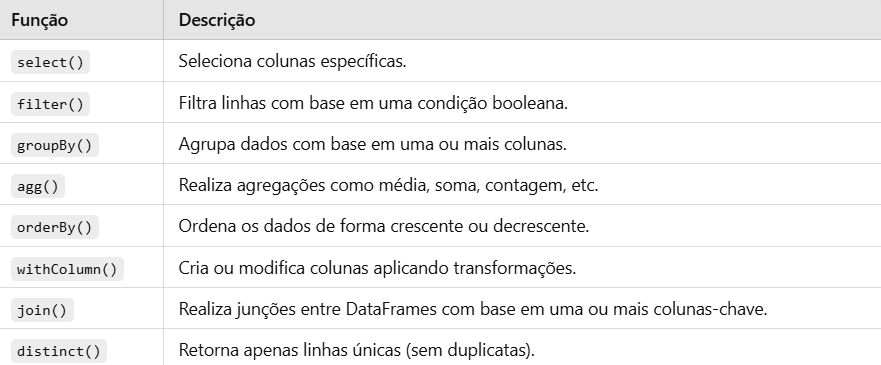

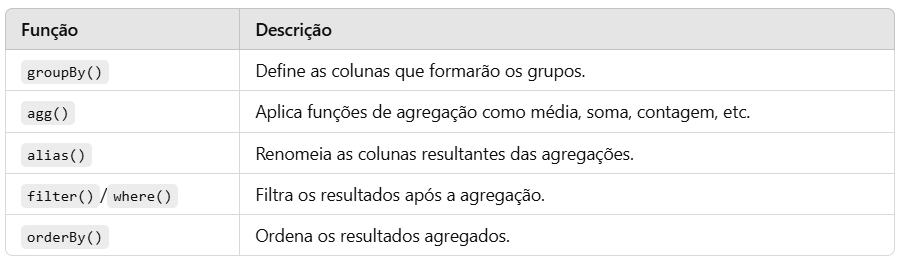

In [ ]:
'''
Selecionando todos os atributos de todos os funcionários
'''
funcionarios.select('*').show()

+---------+--------+---------+------+------+-----+------------+-----------+-------+------------+----+
|matricula|    nome|   cidade|estado|  pais|idade|departamento|      cargo|salario|escolaridade|nota|
+---------+--------+---------+------+------+-----+------------+-----------+-------+------------+----+
|        1|   Lucas|  Atibaia|    SP|Brasil|   35|     Compras|    Gerente|25000.0|    Superior|   8|
|        2|     Ana|São Paulo|    SP|Brasil|   29|      Vendas|Coordenador|12000.0|    Superior|   6|
|        3|   Luiza|   Santos|    SP|Brasil|   38|    Finanças|    Gerente|28000.0|         MBA|   9|
|        4|Fernando|  Atibaia|    SP|Brasil|   36|   Marketing|    Diretor|40000.0|    Mestrado|   7|
|        5|  Sandra|  Atibaia|    SP|Brasil|   28|    Produção|   Analista|23000.0|    Superior|   5|
|        6| Douglas| Bragança|    SP|Brasil|   29|    Finanças|   Analista|11000.0|    Superior|   9|
|        7| Eduardo|  Extrema|    MG|Brasil|   30|   Marketing|    Gerente|12000.0

In [ ]:
'''
Selecionar todos os nomes
'''
funcionarios.select('nome').show()

+--------+
|    nome|
+--------+
|   Lucas|
|     Ana|
|   Luiza|
|Fernando|
|  Sandra|
| Douglas|
| Eduardo|
|   Ester|
|   Pedro|
|   Maria|
+--------+



In [ ]:
'''
Selecionar todos os nomes, cargos e departamentos dos funcionarios
'''
funcionarios.select('nome','cargo','departamento').show()

+--------+-----------+------------+
|    nome|      cargo|departamento|
+--------+-----------+------------+
|   Lucas|    Gerente|     Compras|
|     Ana|Coordenador|      Vendas|
|   Luiza|    Gerente|    Finanças|
|Fernando|    Diretor|   Marketing|
|  Sandra|   Analista|    Produção|
| Douglas|   Analista|    Finanças|
| Eduardo|    Gerente|   Marketing|
|   Ester|   Analista|     Compras|
|   Pedro|   Analista|   Marketing|
|   Maria|   Analista|    Produção|
+--------+-----------+------------+



In [ ]:
'''
Selecione todos os estados distintos
'''
funcionarios.select('estado').distinct().show()

+------+
|estado|
+------+
|    SP|
|    MG|
+------+



In [ ]:
'''
Filtrar os dados: Usa-se .filter() ou .where() para aplicar condições de
filtragem.
'''

In [ ]:
'''
Selecione todos os nomes que começam com a letra E
'''
funcionarios.select('nome').filter(funcionarios.nome.startswith('E')).show()

+-------+
|   nome|
+-------+
|Eduardo|
|  Ester|
+-------+



In [ ]:
# Alternativa com where
'''
Selecione todos os nomes que começam com a letra E
'''
funcionarios.select('nome').where(funcionarios.nome.startswith('E')).show()

+-------+
|   nome|
+-------+
|Eduardo|
|  Ester|
+-------+



In [ ]:
'''
Selecione nome, cargo e departamento de todos os Analistas
'''
funcionarios.select('nome','cargo','departamento')\
.where(funcionarios.cargo == 'Analista').show()

+-------+--------+------------+
|   nome|   cargo|departamento|
+-------+--------+------------+
| Sandra|Analista|    Produção|
|Douglas|Analista|    Finanças|
|  Ester|Analista|     Compras|
|  Pedro|Analista|   Marketing|
|  Maria|Analista|    Produção|
+-------+--------+------------+



In [ ]:
# Alternativa com filter
'''
Selecione nome, cargo e departamento de todos os Analistas
'''
funcionarios.select('nome','cargo','departamento')\
.filter(funcionarios.cargo == 'Analista').show()

+-------+--------+------------+
|   nome|   cargo|departamento|
+-------+--------+------------+
| Sandra|Analista|    Produção|
|Douglas|Analista|    Finanças|
|  Ester|Analista|     Compras|
|  Pedro|Analista|   Marketing|
|  Maria|Analista|    Produção|
+-------+--------+------------+



In [ ]:
'''
Selecione nome, cargo e departamento de todos os Analistas ordenado por
departamento
'''
funcionarios.select('nome','cargo','departamento')\
.where(funcionarios.cargo == 'Analista').orderBy('departamento').show()

+-------+--------+------------+
|   nome|   cargo|departamento|
+-------+--------+------------+
|  Ester|Analista|     Compras|
|Douglas|Analista|    Finanças|
|  Pedro|Analista|   Marketing|
| Sandra|Analista|    Produção|
|  Maria|Analista|    Produção|
+-------+--------+------------+



In [ ]:
'''
Selecione nome, cargo e departamento de todos os Analistas ordenado por
departamento de forma inversa
'''
funcionarios.select('nome','cargo','departamento')\
.where(funcionarios.cargo == 'Analista')\
.orderBy('departamento',ascending=False).show()

+-------+--------+------------+
|   nome|   cargo|departamento|
+-------+--------+------------+
| Sandra|Analista|    Produção|
|  Maria|Analista|    Produção|
|  Pedro|Analista|   Marketing|
|Douglas|Analista|    Finanças|
|  Ester|Analista|     Compras|
+-------+--------+------------+



In [ ]:
'''
Selecione cargo e salário (como salario_medio)
agrupado por cargo
'''
funcionarios.groupby('cargo').agg(F.round(F.avg('salario'),2)\
                                  .alias('salario_medio')).show()

+-----------+-------------+
|      cargo|salario_medio|
+-----------+-------------+
|    Gerente|     21666.67|
|Coordenador|      12000.0|
|    Diretor|      40000.0|
|   Analista|      13800.0|
+-----------+-------------+



In [ ]:
'''
Calcule e exiba o salário médio por estado
'''
funcionarios.groupby('estado').agg(F.round(F.avg('salario'),2)\
                                   .alias('salario_medio')).show()

+------+-------------+
|estado|salario_medio|
+------+-------------+
|    SP|     23166.67|
|    MG|      11750.0|
+------+-------------+



In [ ]:
'''
Calcule e exiba a nota média por departamento
'''
funcionarios.groupby('departamento').agg(F.round(F.avg('nota'),1)\
                                         .alias('nota_media')).show()

+------------+----------+
|departamento|nota_media|
+------------+----------+
|      Vendas|       6.0|
|    Finanças|       9.0|
|   Marketing|       4.0|
|     Compras|       5.0|
|    Produção|       6.0|
+------------+----------+



In [ ]:
'''
Selecione departamento e idade (como idade_media)
agrupado por departamento
'''
funcionarios.groupby('departamento').agg(F.round(F.avg('idade'),1)\
                                         .alias('idade_media')).show()

+------------+-----------+
|departamento|idade_media|
+------------+-----------+
|      Vendas|       29.0|
|    Finanças|       33.5|
|   Marketing|       32.0|
|     Compras|       32.0|
|    Produção|       34.0|
+------------+-----------+

